# prepare exercise

In [30]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
iris = load_iris()

In [5]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [7]:
print(iris.target_names) 
print(iris.target)
print(iris.feature_names) 

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
exerciseData = [4.8, 2.5, 5.3, 2.4]
#segmenting exerciseData into sepal and petal
checkSepal = [ exerciseData[0], exerciseData[1]] 
checkPetal = [ exerciseData[2], exerciseData[3]] 

# 1. train modell for sepal prediction

In [11]:
X_sepal = iris["data"][:, (0, 1)]  #sepal values from data
y_sepal = iris["target"] #target values as numeric value

In [12]:
sepal_model = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=10, random_state=0)
sepal_model.fit(X_sepal,y_sepal)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# 1.1 propability for virginica based on sepal

In [13]:
sepalPredict = sepal_model.predict([ checkSepal ])
sepalProb = sepal_model.predict_proba([checkSepal])

print("Sepal based on:", checkSepal,
      "is an iris", iris.target_names[sepalPredict][0],
      "=> probability: ", round(sepalProb[0][sepalPredict][0]*100, 5),
      "%" )

Sepal based on: [4.8, 2.5] is an iris versicolor => probability:  53.61383 %


# 1.2 plot sepal features

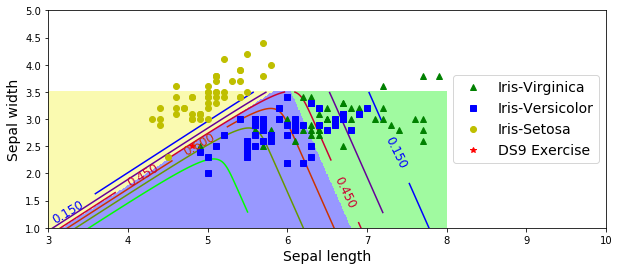

In [15]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = sepal_model.predict_proba(X_new)
y_predict = sepal_model.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X_sepal[y_sepal==2, 0], X_sepal[y_sepal==2, 1], "g^", label="Iris-Virginica")
plt.plot(X_sepal[y_sepal==1, 0], X_sepal[y_sepal==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_sepal[y_sepal==0, 0], X_sepal[y_sepal==0, 1], "yo", label="Iris-Setosa")
plt.plot(-1, -1, "r*", label="DS9 Exercise")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap )
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)
plt.legend(loc="center right", fontsize=14)
plt.axis([3, 10, 1, 5])

plt.plot(checkSepal[0], checkSepal[1], 'r*' ) 

plt.show()

# 2. train modell for sepal prediction

In [16]:
X_petal = iris["data"][:, (2, 3)]  #petal values from data
y_petal = iris["target"] 

In [17]:
petal_model = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=10, random_state=0)
petal_model.fit(X_petal,y_petal)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# 2.1 propability for virginica based on petal

In [18]:
petalPredict = petal_model.predict([ checkPetal ])
petalProb = petal_model.predict_proba([checkPetal])

print("Petal based on:", checkPetal,
      "is an iris", iris.target_names[petalPredict][0],
      "=> probability: ", round(petalProb[0][petalPredict][0]*100, 5),
      "%" )

Petal based on: [5.3, 2.4] is an iris virginica => probability:  99.87688 %


# 2.2 plot petal features

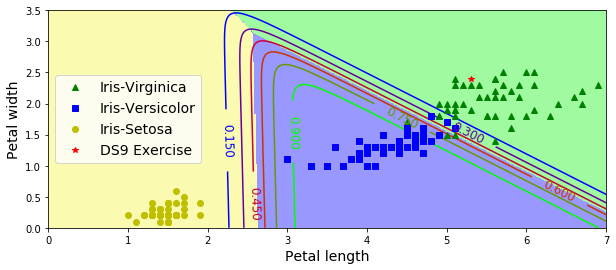

In [22]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = petal_model.predict_proba(X_new)
y_predict = petal_model.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X_petal[y_petal==2, 0], X_petal[y_petal==2, 1], "g^", label="Iris-Virginica")
plt.plot(X_petal[y_petal==1, 0], X_petal[y_petal==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_petal[y_petal==0, 0], X_petal[y_petal==0, 1], "yo", label="Iris-Setosa")
plt.plot(-1, -1, "r*", label="DS9 Exercise") # DS9 label marker

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap ) #linewidth=5
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.plot(checkPetal[0], checkPetal[1], 'r*' ) # example from

plt.show()

# 3. evaluate all 4 values in a (combined) equation to get one single probability

In [34]:
#train modell for prediction with all features
all_X = iris["data"]
all_y = iris["target"]

all_model = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=10, random_state=0)
all_model.fit(all_X,all_y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
allPredict = all_model.predict([exerciseData])
allProb = all_model.predict_proba([exerciseData])

# 3.1 propability for virginica based on all features

In [36]:
print("all features based on:", exerciseData,
      "is an iris", iris.target_names[allPredict][0],
      "=> probability: ", round(allProb[0][allPredict][0]*100, 5),
      "%" )

all features based on: [4.8, 2.5, 5.3, 2.4] is an iris virginica => probability:  99.99571 %
